In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


# **Importing Libraries **

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.callbacks import EarlyStopping

# Fetching Data

In [3]:
train_data = pd.read_csv(dirname+"/"+filenames[0])
test_data = pd.read_csv(dirname+"/"+filenames[1])

In [4]:
print(train_data.shape)
print(test_data.shape)

(7352, 563)
(2947, 563)


# **Splitting Labels and Features**

In [5]:
train_labels = train_data[["subject", "Activity"]]
test_labels = test_data[["subject", "Activity"]]

print(train_labels.shape)
print(test_labels.shape)

train_features = train_data.drop(["subject", "Activity"], axis=1)
test_features = test_data.drop(["subject", "Activity"], axis=1)

print(train_features.shape)
print(test_features.shape)

(7352, 2)
(2947, 2)
(7352, 561)
(2947, 561)


# Data Analysis

In [6]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


**Checking Null Data**

In [7]:
train_data.isnull()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7348,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7349,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7350,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Unique Features**

In [8]:
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

**Label Count of Train Data**

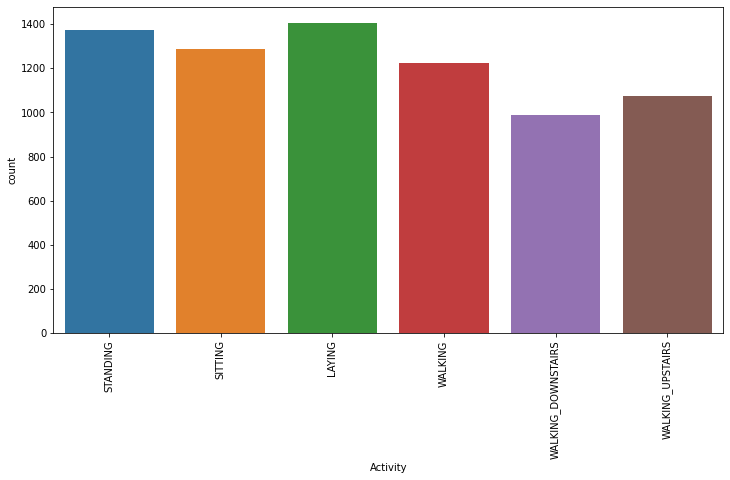

In [9]:
plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=train_data)
plt.xticks(x=train_data['Activity'],rotation='vertical')
plt.show()

**Label Count of Test Data**

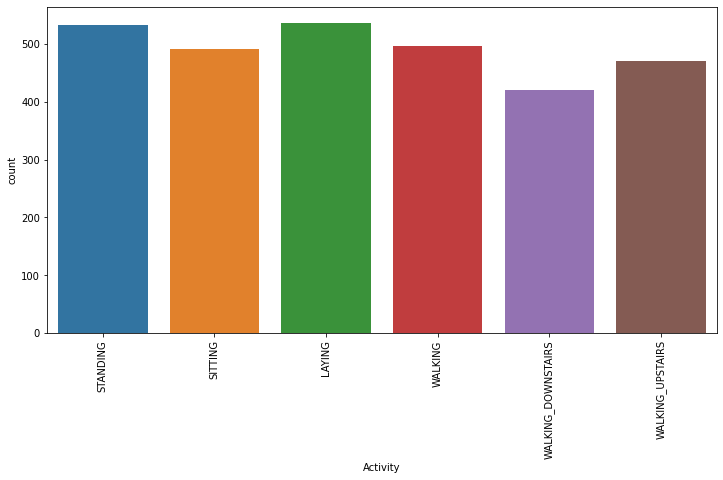

In [10]:
plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=test_data)
plt.xticks(x=test_data['Activity'],rotation='vertical')
plt.show()

# Machine Learning Approach

In [11]:
labels_idx = {
    'STANDING': 0, 
    'SITTING': 1,
    'LAYING': 2, 
    'WALKING': 3, 
    'WALKING_DOWNSTAIRS': 4,
 'WALKING_UPSTAIRS':5
}

indexed_train_labels = train_labels["Activity"].apply(lambda num: labels_idx[num])
indexed_test_labels = test_labels["Activity"].apply(lambda num: labels_idx[num])

print(indexed_train_labels)
print(indexed_test_labels)

0       0
1       0
2       0
3       0
4       0
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: Activity, Length: 7352, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
2942    5
2943    5
2944    5
2945    5
2946    5
Name: Activity, Length: 2947, dtype: int64


In [12]:
scaled_features = MinMaxScaler().fit_transform((train_features**2), indexed_train_labels)
scaled_features = scaled_features**2
print(scaled_features.shape)
pd.DataFrame(scaled_features)

(7352, 561)


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.006936,1.696232e-07,0.000312,0.981248,9.346097e-01,0.696441,0.980591,9.344159e-01,0.727442,0.763367,...,3.051358e-05,8.107500e-03,0.254792,0.000162,8.540797e-07,0.046657,1.157700e-07,0.500199,0.001048,1.181377e-05
1,0.006009,7.252610e-08,0.000233,0.993000,9.052615e-01,0.850487,0.995237,9.033705e-01,0.841188,0.790990,...,6.243780e-04,1.277322e-01,0.551351,0.000008,3.053053e-09,0.288091,2.449529e-01,0.508692,0.001056,8.704303e-06
2,0.006116,1.436184e-07,0.000166,0.981646,8.755130e-01,0.918399,0.986152,8.624033e-01,0.912875,0.776411,...,2.951956e-02,2.375042e-02,0.334118,0.000198,1.001609e-03,0.000103,4.273489e-01,0.518774,0.001065,5.820443e-06
3,0.006074,4.712463e-07,0.000231,0.984457,9.357210e-01,0.963219,0.988448,9.327643e-01,0.957892,0.776411,...,2.679079e-02,1.928099e-04,0.054405,0.000002,2.762180e-08,0.167784,5.549821e-02,0.518078,0.001096,5.160979e-06
4,0.005856,7.537959e-08,0.000177,0.992575,9.259194e-01,0.962467,0.993301,9.211334e-01,0.962309,0.788985,...,5.929906e-05,1.554681e-02,0.239236,0.000231,2.254957e-04,0.231410,1.439594e-01,0.516162,0.001175,3.711517e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.008064,1.070001e-05,0.001079,0.001457,2.536975e-06,0.000035,0.006351,3.618834e-06,0.000013,0.001974,...,2.422568e-05,1.221437e-01,0.601146,0.001315,4.739395e-01,0.001835,3.281575e-02,0.392510,0.003241,6.160058e-06
7348,0.005624,3.606245e-09,0.000473,0.003066,5.377332e-10,0.000012,0.010824,7.528524e-07,0.000042,0.000190,...,7.458687e-04,2.374803e-02,0.214954,0.000018,5.880034e-01,0.597063,2.565620e-02,0.354163,0.004076,6.276319e-06
7349,0.005586,8.372980e-08,0.000004,0.002268,1.162457e-04,0.005680,0.008599,9.572251e-05,0.012235,0.000004,...,1.446909e-03,4.072716e-07,0.008552,0.000008,5.061166e-03,0.558299,2.417076e-01,0.367775,0.003853,2.774066e-06
7350,0.007039,1.260678e-07,0.000628,0.002306,1.541498e-04,0.005228,0.009293,2.163445e-05,0.010417,0.000107,...,3.695899e-08,1.699299e-05,0.014068,0.000106,2.411165e-01,0.769757,1.207461e-01,0.379359,0.003688,4.122782e-07


In [13]:
scaled_test_features = MinMaxScaler().fit_transform((test_features**2), indexed_test_labels)
scaled_test_features = scaled_test_features**2
print(scaled_test_features.shape)
pd.DataFrame(scaled_test_features)

(2947, 561)


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.021190,0.000017,4.138000e-07,0.776682,7.166758e-01,0.199571,0.825039,7.328817e-01,0.207650,7.768208e-01,...,2.634725e-05,0.011913,0.248402,1.744108e-09,7.234265e-04,0.465243,5.405625e-03,0.275120,0.005870,0.000013
1,0.032515,0.000002,1.824225e-03,0.906652,8.760488e-01,0.800695,0.950446,8.794710e-01,0.803812,7.768208e-01,...,2.590564e-02,0.000220,0.125286,4.860055e-05,9.626271e-08,0.035601,7.182425e-01,0.241761,0.006265,0.000055
2,0.027954,0.000027,1.767847e-03,0.977041,8.850209e-01,0.862715,0.980084,8.879790e-01,0.865545,9.461162e-01,...,1.564364e-05,0.001315,0.168545,1.493136e-06,1.719889e-03,0.000017,4.428788e-04,0.248619,0.006154,0.000044
3,0.025894,0.000065,1.730351e-03,0.980679,8.972823e-01,0.878387,0.983522,9.017283e-01,0.885167,9.434978e-01,...,1.854412e-04,0.014072,0.293632,8.484583e-08,5.841351e-04,0.013384,7.718854e-03,0.243015,0.006516,0.000039
4,0.027688,0.000035,2.553529e-03,0.977173,8.760038e-01,0.919806,0.978933,8.706092e-01,0.916447,9.434978e-01,...,2.194405e-04,0.081732,0.513692,2.440404e-11,2.640737e-06,0.294577,1.974780e-04,0.233394,0.007144,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.045037,0.000469,8.751889e-04,0.006878,3.906671e-04,0.002149,0.016114,4.899106e-04,0.002913,1.435078e-03,...,3.075724e-05,0.020046,0.317774,1.296258e-02,1.476673e-02,0.613175,2.385739e-01,0.181141,0.005688,0.001300
2943,0.085105,0.000136,1.141560e-03,0.008711,6.277049e-07,0.001493,0.019514,8.138526e-07,0.005357,1.435078e-03,...,1.076455e-04,0.010541,0.240476,2.945540e-01,1.985264e-02,0.186798,1.082378e-02,0.185215,0.005602,0.001235
2944,0.073170,0.000047,1.630556e-03,0.011826,3.154199e-06,0.003934,0.022719,3.153252e-04,0.014567,3.771954e-09,...,1.926139e-05,0.000200,0.047636,1.086637e-03,6.320056e-05,0.235555,1.738959e-02,0.185425,0.005676,0.001202
2945,0.015396,0.000007,7.865724e-04,0.010917,2.787493e-03,0.001864,0.023759,6.112399e-03,0.007053,3.771954e-09,...,4.661380e-06,0.001781,0.145617,3.905822e-02,4.624174e-01,0.745784,4.950980e-09,0.190678,0.004915,0.001380


In [14]:
train_new = train_data
test_new = test_data
for i in list(train_data.columns.values):
  # print(i)
  train_new[i] = LabelEncoder().fit_transform(train_data[i])
  # test_new[i] = LabelEncoder().fit_transform(test[i])

train_new

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,5516,2499,1210,1196,1489,3423,1429,1468,3332,1481,...,3690,1894,3857,1898,3572,1376,3636,2575,0,2
1,4146,4140,1664,148,1995,2792,75,2027,2859,316,...,1585,4553,3530,1260,6752,1306,3644,2645,0,2
2,4533,2705,2615,1159,2395,1940,889,2563,2033,1072,...,3081,1856,4933,4078,7039,1209,3652,2737,0,2
3,4397,1700,1686,876,1467,691,673,1499,892,1072,...,5612,2712,3481,5844,1376,1215,3673,2785,0,2
4,3458,4056,2365,173,1670,721,177,1744,744,427,...,3807,5347,4574,5975,903,1229,3743,2876,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,5930,339,306,5783,5983,6871,5580,6193,6845,4427,...,1319,1462,7116,4472,1598,2150,5208,4786,20,5
7348,2698,5869,758,5557,5772,6820,5326,5758,6893,4248,...,4011,4721,7209,766,5706,2592,5640,4788,20,5
7349,2633,3827,7004,5668,5102,7178,5438,5304,7236,4114,...,6382,4541,1929,6483,6744,2434,5539,4572,20,5
7350,5580,2884,554,5660,5051,7174,5392,5498,7228,4215,...,6245,1976,6802,6918,1009,2286,5450,4145,20,5


In [15]:
test_new = test_data
for i in list(test_data.columns.values):
  test_new[i] = LabelEncoder().fit_transform(test_data[i])

test_new

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,652,818,2900,1449,1245,1531,1428,1231,1528,967,...,1383,1482,1977,412,2037,1516,2331,1012,0,2
1,2160,2004,814,1159,831,1174,960,829,1165,967,...,1824,866,1515,823,2913,1614,2348,836,0,2
2,1271,690,851,546,793,991,555,792,977,315,...,1652,1135,2065,1500,1798,1600,2343,874,0,2
3,942,478,880,438,742,929,450,732,881,363,...,1240,1267,1953,1864,2076,1610,2363,885,0,2
4,1194,617,528,543,833,669,585,859,691,363,...,643,1393,1301,2333,1290,1636,2402,911,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,2504,150,2131,2148,2096,2503,2109,2169,2510,1806,...,1151,410,2302,2569,297,1912,2321,2686,8,5
2943,2800,327,1731,2106,2513,2546,2058,2460,2405,1806,...,1415,70,597,597,2122,1896,2314,2675,8,5
2944,2750,2884,960,2021,2374,2416,2009,2210,2124,1616,...,2192,611,1750,2290,2172,1895,2320,2663,8,5
2945,431,2818,2235,2040,1813,2526,1998,1751,2337,1616,...,1737,2652,104,2715,1510,1869,2240,2701,8,5


**Null Check**

In [16]:
train_new.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [17]:
test_new.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [18]:
# input train
train_x = train_new.iloc[:,0:-1]
# output train
train_y = train_new.iloc[:,-1]

# test input
test_x = test_new.iloc[:,0:-1]
# test output
test_y = test_new.iloc[:,-1]
train_y


0       2
1       2
2       2
3       2
4       2
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: Activity, Length: 7352, dtype: int64

In [19]:
from sklearn import preprocessing
temp_x = preprocessing.normalize(train_x)
temp_t_x = preprocessing.normalize(test_x)
temp_x

array([[0.07382821, 0.03344755, 0.01619509, ..., 0.04866559, 0.03446477,
        0.        ],
       [0.06358308, 0.06349106, 0.02551911, ..., 0.0558844 , 0.04056373,
        0.        ],
       [0.07131228, 0.04255454, 0.04113868, ..., 0.05745256, 0.04305796,
        0.        ],
       ...,
       [0.02330331, 0.03387078, 0.06198875, ..., 0.0490228 , 0.04046439,
        0.00017701],
       [0.05125875, 0.02649287, 0.00508913, ..., 0.05006455, 0.03807662,
        0.00018372],
       [0.06210547, 0.04827376, 0.0018113 , ..., 0.04998443, 0.04071755,
        0.00018296]])

## SVC Model Implementation

In [20]:
from sklearn.svm import SVC
model = SVC()
model.fit(temp_x, train_y)

SVC()

In [21]:
print(model.score(temp_t_x, test_y)*100,"%")

95.75839837122497 %


In [22]:
svc_model = SVC(kernel="linear")
svc_model.fit(scaled_features, indexed_train_labels)
svc_predict = svc_model.predict(scaled_test_features)
print("Accuracy score", accuracy_score(svc_predict, indexed_test_labels)*100, "%")

Accuracy score 95.52086868001356 %


In [23]:
svc_model = SVC(gamma="scale")
svc_model.fit(scaled_features, indexed_train_labels)
svc_predict = svc_model.predict(scaled_test_features)
print("Accuracy score", accuracy_score(svc_predict, indexed_test_labels)*100, "%")

Accuracy score 95.01187648456056 %


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_x, train_y, test_size = 0.25, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)
 
print (xtrain[0:10, :])

[[-1.5547421   0.51821059  0.20011534 ... -0.31678525 -0.63508022
   0.23409035]
 [-1.0897668  -0.65988291  1.60714146 ... -0.85889539 -1.03587457
   0.16572823]
 [ 0.80921787 -0.81104562 -0.90691174 ...  1.11858007 -0.31111833
  -1.35517916]
 ...
 [ 0.62422532  0.30839849 -0.29463653 ...  1.3638681   0.6392209
   1.46445944]
 [ 0.32173718  0.39960541 -1.39541081 ...  0.32487487 -0.14074453
  -1.28681874]
 [-0.75169301 -0.82332229 -0.33401218 ...  1.30150406 -0.46933447
   0.02592991]]


## Implementation of Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [27]:
y_pred = classifier.predict(xtest)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[319   3   1   2  10  22]
 [ 14 275  15  11   3  32]
 [  0  11 269  20  11  24]
 [  0   0   0 259  32  17]
 [  0   0   0   0 234   6]
 [  0   0   0   1  19 228]]


In [29]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100, "%")

Accuracy :  86.18063112078346 %


In [30]:
lr_classifier = LogisticRegression()
lr_classifier.fit(train_features, indexed_train_labels)
lr_pred = lr_classifier.predict(test_features)
print ("Accuracy : ", accuracy_score(indexed_test_labels, lr_pred)*100, "%")

Accuracy :  95.79233118425518 %


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
lr_classifier2 = LogisticRegression()
lr_classifier2.fit(scaled_features, indexed_train_labels)
lr_pred2 = lr_classifier2.predict(scaled_test_features)
print ("Accuracy : ", accuracy_score(indexed_test_labels, lr_pred2)*100, "%")

Accuracy :  95.92806243637597 %


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Deep learning Approach

## Pre Processing Data

In [32]:
columns = train_features.columns

In [33]:
column_idx = [index for index, value in enumerate(columns)]
print(len(column_idx))
column_idx[0:10]

561


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
train_features.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
test_features.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
train_features

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


# LSTM Model

# Implementation of LSTM Model

In [38]:
def LSTM_Model(data):
    print("data shape: ", data.shape)
    model = Sequential([
        layers.Input(shape=data.shape[1:]),
        layers.LSTM(64, activation="tanh", return_sequences=True),
        layers.Dropout(0.1),
        layers.LSTM(32, activation="tanh"),
        layers.Dropout(0.1),
        
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(6, activation="sigmoid"),
        
    ], name="LSTM_Sequential")
    
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
#     print(model.summary())
    
    return model

In [39]:
lstm_model = LSTM_Model(scaled_features.reshape(scaled_features.shape[0], scaled_features.shape[1], 1))
lstm_model.summary()

data shape:  (7352, 561, 1)


2022-08-28 19:42:54.419423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 19:42:54.554260: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 19:42:54.555458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 19:42:54.557894: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "LSTM_Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 561, 64)           16896     
_________________________________________________________________
dropout (Dropout)            (None, 561, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 6)             

# Model Train

In [40]:
earlystopping = EarlyStopping(patience=30, monitor="val_accuracy") # wait of 30 similar epochs
lstm_history = lstm_model.fit(scaled_features.reshape(scaled_features.shape[0], scaled_features.shape[1], 1),
             indexed_train_labels, validation_split=0.15, epochs=100, callbacks = [earlystopping]
         )

Epoch 1/100


2022-08-28 19:42:57.802730: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-28 19:43:01.173557: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


196/196 [==============================] - 14s 47ms/step - loss: 1.2408 - accuracy: 0.3341 - val_loss: 1.1109 - val_accuracy: 0.3699
Epoch 2/100
196/196 [==============================] - 8s 42ms/step - loss: 1.1054 - accuracy: 0.3876 - val_loss: 1.0436 - val_accuracy: 0.4606
Epoch 3/100
196/196 [==============================] - 8s 42ms/step - loss: 1.0595 - accuracy: 0.4185 - val_loss: 1.0084 - val_accuracy: 0.4778
Epoch 4/100
196/196 [==============================] - 8s 42ms/step - loss: 1.0453 - accuracy: 0.4454 - val_loss: 1.0277 - val_accuracy: 0.4678
Epoch 5/100
196/196 [==============================] - 8s 42ms/step - loss: 1.0193 - accuracy: 0.4694 - val_loss: 0.9990 - val_accuracy: 0.4977
Epoch 6/100
196/196 [==============================] - 8s 42ms/step - loss: 1.0038 - accuracy: 0.4804 - val_loss: 0.9854 - val_accuracy: 0.4778
Epoch 7/100
196/196 [==============================] - 8s 42ms/step - loss: 0.9741 - accuracy: 0.5058 - val_loss: 0.9238 - val_accuracy: 0.5694
Epo

# Plot Details

In [41]:
lstm_history.history.keys()
lstm_history_loss = lstm_history.history["loss"]
lstm_history_val_loss = lstm_history.history["val_loss"]
lstm_history_accuracy = lstm_history.history["accuracy"]
lstm_history_val_accuracy = lstm_history.history["val_accuracy"]

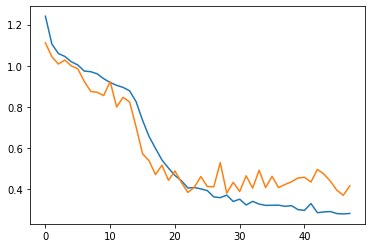

In [42]:
plt.plot(list(range(len(lstm_history_loss))), lstm_history_loss)
plt.plot(list(range(len(lstm_history_val_loss))), lstm_history_val_loss)

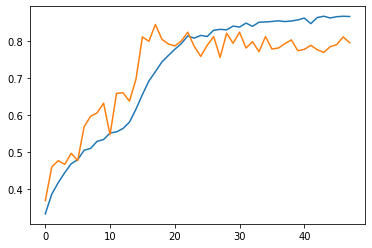

In [43]:
plt.plot(list(range(len(lstm_history_accuracy))), lstm_history_accuracy)
plt.plot(list(range(len(lstm_history_val_accuracy))), lstm_history_val_accuracy)

# CNN-1D

# Implementation of CNN

2 Convulation Layer, 2 Hidden Layer, 1 Output Layer

In [45]:
def CNN_Model(data):
    model = Sequential(name="CNN_Sequential")
    print(data.shape[1:])
    model.add( layers.Input(shape=data.shape[1:]) )
    model.add( layers.Conv1D(64, 3, activation="tanh", name="conv_1") )
#         layers.Dropout(0.1),
    model.add( layers.Conv1D(32, 3, activation="tanh", name="conv_2") )
#         layers.Dropout(0.1),
    
    model.add(layers.Flatten())

    model.add( layers.Dense(64, activation="relu", name="dense_1") )
    model.add( layers.Dense(128, activation="sigmoid", name="dense_2") )
    model.add( layers.Dense(6, activation="sigmoid", name="output") )
    
    
    
    model.compile(optimizer=tf.keras.optimizers.SGD(), 
                  loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
#     print(model.summary())
    
    return model

In [46]:
cnn_model = CNN_Model(scaled_features.reshape(scaled_features.shape[0], scaled_features.shape[1], 1))
cnn_model.summary()

(561, 1)
Model: "CNN_Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv1D)              (None, 559, 64)           256       
_________________________________________________________________
conv_2 (Conv1D)              (None, 557, 32)           6176      
_________________________________________________________________
flatten (Flatten)            (None, 17824)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1140800   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
output (Dense)               (None, 6)                 774       
Total params: 1,156,326
Trainable params: 1,156,326
Non-trainable params: 0
_________________________________

In [47]:
earlystopping = EarlyStopping(patience=30, monitor="val_accuracy")
cnn_history = cnn_model.fit(scaled_features.reshape(scaled_features.shape[0], scaled_features.shape[1], 1),
             indexed_train_labels, epochs=100, callbacks = [earlystopping]
         )

Epoch 1/100
230/230 [==============================] - 6s 4ms/step - loss: 1.4719 - accuracy: 0.3388
Epoch 2/100
230/230 [==============================] - 1s 3ms/step - loss: 1.0887 - accuracy: 0.4944
Epoch 3/100
230/230 [==============================] - 1s 3ms/step - loss: 0.9807 - accuracy: 0.6007
Epoch 4/100
230/230 [==============================] - 1s 3ms/step - loss: 0.8518 - accuracy: 0.6817
Epoch 5/100
230/230 [==============================] - 1s 3ms/step - loss: 0.6944 - accuracy: 0.7429
Epoch 6/100
230/230 [==============================] - 1s 3ms/step - loss: 0.5486 - accuracy: 0.7952
Epoch 7/100
230/230 [==============================] - 1s 3ms/step - loss: 0.4419 - accuracy: 0.8273
Epoch 8/100
230/230 [==============================] - 1s 3ms/step - loss: 0.3668 - accuracy: 0.8598
Epoch 9/100
230/230 [==============================] - 1s 3ms/step - loss: 0.3225 - accuracy: 0.8715
Epoch 10/100
230/230 [==============================] - 1s 3ms/step - loss: 0.2847 - accura

In [48]:
cnn_history.history.keys()
cnn_history_loss = lstm_history.history["loss"]
cnn_history_val_loss = lstm_history.history["val_loss"]
cnn_history_accuracy = lstm_history.history["accuracy"]
cnn_history_val_accuracy = lstm_history.history["val_accuracy"]

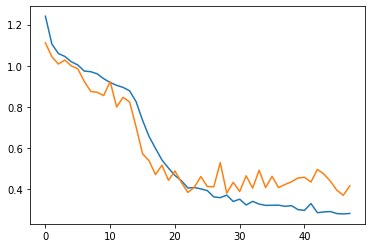

In [49]:
plt.plot(list(range(len(cnn_history_loss))), cnn_history_loss)
plt.plot(list(range(len(cnn_history_val_loss))), cnn_history_val_loss)

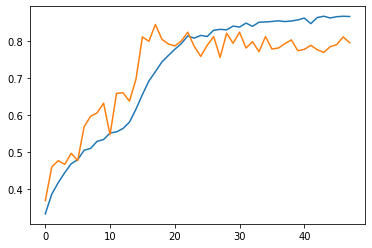

In [50]:
plt.plot(list(range(len(cnn_history_accuracy))), cnn_history_accuracy)
plt.plot(list(range(len(cnn_history_val_accuracy))), cnn_history_val_accuracy)

In [51]:
cnn_predict = cnn_model.predict(scaled_test_features.reshape(scaled_test_features.shape[0], scaled_test_features.shape[1], 1))

In [52]:
lstm_predict = lstm_model.predict(scaled_test_features.reshape(scaled_test_features.shape[0], scaled_test_features.shape[1], 1))

In [53]:
cnn_max_predict = []
for i in cnn_predict:
    cnn_max_predict.append(np.argmax(i))

In [54]:
lstm_max_predict = []
for i in lstm_predict:
    lstm_max_predict.append(np.argmax(i))

In [55]:
print("CNN accuracy: ", accuracy_score(indexed_test_labels, cnn_max_predict))

CNN accuracy:  0.9487614523243977


In [56]:
print("LSTM accuracy: ", accuracy_score(indexed_test_labels, lstm_max_predict))

LSTM accuracy:  0.846284356973193


Text(0.5, 1.0, 'CNN Prediction')

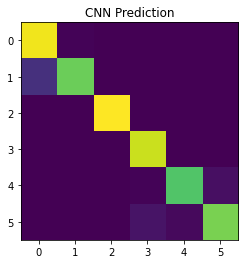

In [57]:
plt.imshow( confusion_matrix(indexed_test_labels, cnn_max_predict), )
plt.title("CNN Prediction")

Text(0.5, 1.0, 'LSTM Prediction')

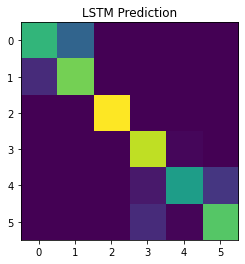

In [58]:
plt.imshow( confusion_matrix(indexed_test_labels, lstm_max_predict) )
plt.title("LSTM Prediction")